In [1]:
%matplotlib inline 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

from __future__ import division

import numpy as np

from util import plotutil

from infotopo.models.rxnnet import experiments
from infotopo.models.rxnnet.examples.toynets import path2mah as net

In [18]:
from infotopo.models.rxnnet import model, ratelaw, experiments

net = model.make_path([ratelaw.mah11]*2, cids=['C1','C2','KE1','KE2'])
type(net)

infotopo.models.rxnnet.model.Network

In [19]:
expts_xc = experiments.get_experiments(zids=net.xids, uids=['C1','C2'], us=[[2,1],[3,2]])
type(expts_xc)

infotopo.models.rxnnet.experiments.Experiments

In [20]:
pred_xc = net.get_predict(expts_xc, tol=1e-13)

In [21]:
type(pred_xc)

infotopo.predict.Predict

In [22]:
print pred_xc.pids
print pred_xc.yids

['k1f', 'k2f']
["(('C1', '=', 2), ('C2', '=', 1)), X, inf", "(('C1', '=', 3), ('C2', '=', 2)), X, inf"]


In [11]:
print net.ratelaws
print net.p
print net.c

R1    k1f*(C1 - X/KE1)
R2    k2f*(X - C2/KE2)
dtype: object
k1f    1
k2f    1
dtype: float64
KE1    1
KE2    1
dtype: float64


In [2]:
expts_xc = experiments.get_experiments(net.xids, uids=['C1','C2'], us=[[2,1],[3,2]])
expts_jc = experiments.get_experiments(net.Jids[0], uids=['C1','C2'], us=[[2,1]])
expts_xt = experiments.get_experiments(net.xids, uids=['t'], us=[1])

In [4]:
pred_xc = net.get_predict(expts_xc, tol=1e-13)
pred_jc = net.get_predict(expts_jc, tol=1e-13)
pred_xt = net.get_predict(expts_xt, tol=1e-13)

In [5]:
pred_xc.get_spectrum(pred_xc.p0.randomize())

array([  6.12237857e-01,   7.23372631e-17])

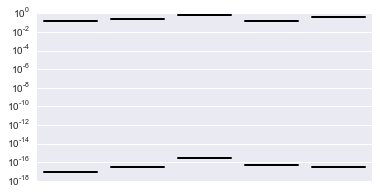

In [6]:
pred_xc.plot_spectra([pred_xc.p0.randomize(seed=i) for i in range(5)], figsize=(6,3))

In [23]:
pred = pred_xc + pred_xt

In [26]:
pred.get_spectrum(pred.p0.randomize())

array([ 0.66849315,  0.01431124])

In [29]:
gdss = pred.get_geodesics(seeds=[2])

In [30]:
gdss.integrate(tmax=10, dt=0.1)

(2, (-1, True))
(2, (-1, False))
(2, (-2, True))
(2, (-2, False))


/Library/Python/2.7/site-packages/scipy/integrate/_ode.py:869: UserWarning: vode: Excess work done on this call. (Perhaps wrong MF.)
  'Unexpected istate=%s' % istate))
